# Part 2: EDA 

Let's understand the data to be able to create prediction based on the analysis that we found, eg. Which features can be use to predict

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

### Read data from pre-processed

We already pre-processed our data into a correct format and understand which part contains what data.
Let's start read the data and doing quick review

In [2]:
dataset = pd.read_csv("../data/pre-processed/lung_cancer.csv", index_col=False)

dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [3]:
dataset.describe().loc[['mean', 'std', '50%', 'min', 'max']]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
mean,0.524272,62.673139,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
50%,1.000000,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Analyzing the data

From the data above we know that.

1. Other than `AGE` column, every columns are a `0` and `1` value, which mean they are a `True` or `False` and `MALE` or `FEMALE`
2. `AGE` median of the data is around 62 years old that being on the survey, which is the survey probably took the elderly to become the target.
3. `AGE` standard deviation or the data range is `8` which mean the spread of the data is pretty big
4. `GENDER` column contains `1` ( M ) and `0` ( F )
5. `LUNG_CANCER` column contains `1` ( YES ) and `0` ( NO )

### Understand the correlation


Let's check the correlation between features to understand which features is necessary to be use

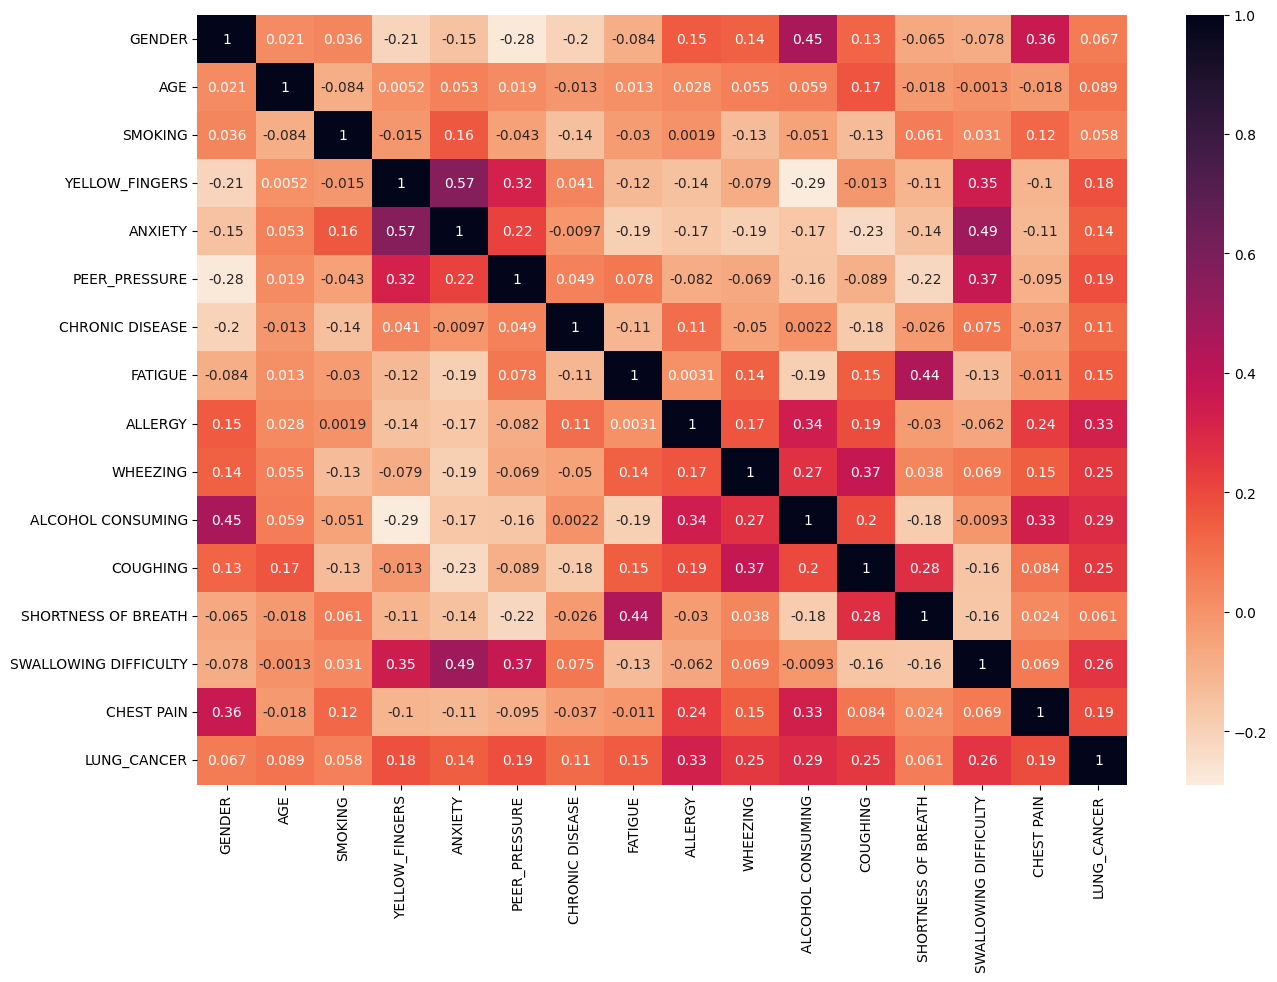

In [4]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), cmap="rocket_r", annot=True)
plt.show()


### Understanding the correlation

We know that from the correlation plot above are
1. Smoking has low correlation with all variables that affecting lung cancer, and also not correlated to lung cancer as well
2. Yellow fingers and anxiety has a high correlation which is 57% and both have decent correlation with lung cancer
3. Swallowing difficulty and anxiety has a high correlation with 49% and have somehow a good correlation with lung cancer
4. Shortness of breath and fatigue has a high correlation with 44% and have decent correlation with lung cancer
5. Allergy and alcohol consuming has a high correlation with 34% and highest correlated with lung cancer, which indicates it's a big factor of lung cancer
6. Alcohol consuming and wheezing also has a high correlation with 37% and high correlated with lung cancer, which also indicates the lung cancer factor
7. Chest pain and alcohol consuming also has a high correlation with 33% and also highly correlated with lung cancer, might also indicates a lung cancer factor


From those point above, we know that.
- Alcohol consuming and wheezing can be the X factor
- Alcohol consuming and allergy can be the X factor
- Chest pain and alcohol consuming also can be the X factor
- Swallowing difficulty and anxiety also can be the X factor


The features that I will take after looking at the correlation is probably
1. Alcohol Consuming
2. Wheezing
3. Allergy
4. Chest Pain

### Understanding the distribution of the data

After knowing which variables correlated to each others, we also need to know where does our data falls into?

Does the data that get the lung cancer is falling in specific range of age?

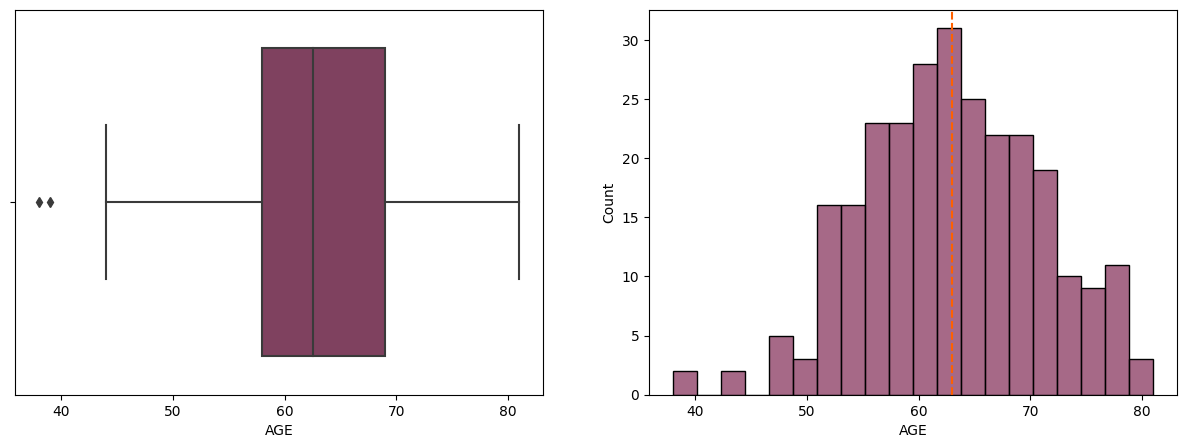

In [5]:
lung_cancer_dataset = dataset[dataset["LUNG_CANCER"] == 1]


fig, axs = plt.subplots(ncols=2, figsize=(15,5))

sns.boxplot(data=lung_cancer_dataset, x="AGE", ax=axs[0], color="#89375F")
sns.histplot(data=lung_cancer_dataset, x="AGE", bins=20, ax=axs[1], color="#89375F")
plt.axvline(x=lung_cancer_dataset["AGE"].mean(), color='#FF6000', lw=1.5, ls="--")

plt.show()

### Analyzing Data Distribution

The distribution of data by AGE is pretty normal, the range fall between AGE of 52-72 years old data points.

Which mean the people who are around 52-72 years old is most-likely has Lung Cancer

---

# Result

We will use this features as a independent variables to understand and predict who is getting lung cancer

1. Alcohol Consuming
2. Wheezing
3. Allergy
4. Chest Pain
5. Age
6. Lung Cancer ( As a label )

In [6]:
filtered_dataset = dataset[["AGE", "ALCOHOL CONSUMING", "ALLERGY", "CHEST PAIN", "WHEEZING", "LUNG_CANCER"]]
filtered_dataset

,AGE,ALCOHOL CONSUMING,ALLERGY,CHEST PAIN,WHEEZING,LUNG_CANCER
0,69,1,0,1,1,1
1,74,0,1,1,0,1
2,59,0,0,1,1,0
3,63,1,0,1,0,0
4,63,0,0,0,1,0
...,...,...,...,...,...,...
304,56,1,0,0,0,1
305,70,1,1,1,1,1
306,58,1,1,1,1,1
307,67,1,1,1,0,1


## SAVE DATA to `pre-processed/filtered_features.csv`

Saving the data into the file as `filtered_features.csv` so we can consume it to train a models

In [7]:
filtered_dataset.to_csv("../data/pre-processed/filtered_features.csv", index=False)